In [1]:
print("netflix recommendation code")

netflix recommendation code


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
movies <- read.table("u.item", sep = "|", header = FALSE, stringsAsFactors = FALSE, quote="")
movies <- movies[,c(1,2)]
names(movies) <- c("movieid","movie")

rank   <- read.table("u.data", sep = "\t", header = FALSE, stringsAsFactors = FALSE,
                     col.names = c("userid","movieid","rating","ts"))
'''
#read tables
rating_cols = ["userid","movieid","rating","ts"]
movie_cols = ["movieid","movie",]
ratings = pd.read_table('/Users/aslakey/Desktop/u.data',sep='\t',header=None, names=rating_cols)
movies = pd.read_table('/Users/aslakey/Desktop/u.item',sep='|',header=None,encoding = "ISO-8859-1")
ratings.head()
movies = movies.rename(columns={0: 'movieid', 1: 'movie'})
movies.head()
#join tables by movie id
df = movies.join(ratings, on=['movieid'], rsuffix='_r')
df.head()
#pivot table with cols= movies, rows= users, vals=ratings
rp = df.pivot_table(columns=['movieid'],index=['userid'],values='rating')
rp.head()
#convert NA's to 0. very sparse
rp = rp.fillna(0);
#make this into a numpy matrix:
Q = rp.values
Q #NxD matrix we wish to factor into X (users) and Y(movies) based on rated movies


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

0th iteration is completed
1th iteration is completed
2th iteration is completed
3th iteration is completed
4th iteration is completed
5th iteration is completed
6th iteration is completed
7th iteration is completed
8th iteration is completed
9th iteration is completed
10th iteration is completed
11th iteration is completed
12th iteration is completed
13th iteration is completed
14th iteration is completed
[0.2250982789356766, 0.11808427470249522, 0.077860678814641759, 0.056170702685553305, 0.042860555904640212, 0.034012012479305583, 0.02779215214580609, 0.023234780568115714, 0.019786035217702374, 0.017107793722692374, 0.014983200907872724, 0.013267518740862631, 0.011860902977283748, 0.010692536651557472, 0.0097109823340092456]


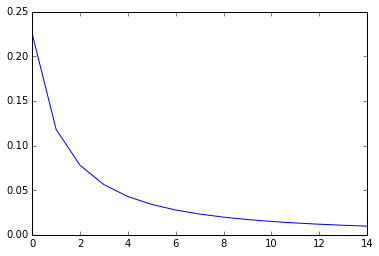

In [57]:
#error calculation
def get_error(Q, X, Y, W):
    return (np.sum((W * (Q - np.dot(X, Y)))**2)/np.count_nonzero(W))
            
#Alternating Least Squares Algo            
def ALS(Q):
    factors = 5 #dimensions of PCA factorization
    lambda_ = 0.1 #set reguralization term, also helps inverting
    n, d = Q.shape #grab other dimensions from Q
    n_iterations = 15
    #intialize W that will give no wieght to missing data
    W = Q>0.5
    W[W == True] = 1
    W[W == False] = 0
    # To be consistent with our Q matrix
    W = W.astype(np.float64, copy=False)
    #initialize X and Y
    X = 5 * np.random.rand(n, factors) #5 times random between 0 and 1
    Y = 5 * np.random.rand(factors, d)

    #begin iteration:
    weighted_errors = []
    for ii in range(n_iterations):
        for u, Wu in enumerate(W):
            X[u] = np.linalg.solve(np.dot(Y, np.dot(np.diag(Wu), Y.T)) + lambda_ * np.eye(factors),
                        np.dot(Y, np.dot(np.diag(Wu), Q[u].T))).T
        for i, Wi in enumerate(W.T):
            Y[:,i] = np.linalg.solve(np.dot(X.T, np.dot(np.diag(Wi), X)) + lambda_ * np.eye(factors),
                        np.dot(X.T, np.dot(np.diag(Wi), Q[:, i])))
        weighted_errors.append(get_error(Q, X, Y, W))
        print('{}th iteration is completed'.format(ii))
    Q_hat = np.dot(X,Y)
    return(Q_hat,weighted_errors)
Q_hat,weighted_errors = ALS(Q)
print(weighted_errors)
%matplotlib inline
plt.plot(weighted_errors)  

[0.24783965262903465, 0.12514525787639644, 0.080902942353394694, 0.057735903894051671, 0.04375816328993163, 0.034566670479264414, 0.028154299723839989, 0.02348153007492719, 0.019959995497745294, 0.017233924351498797]


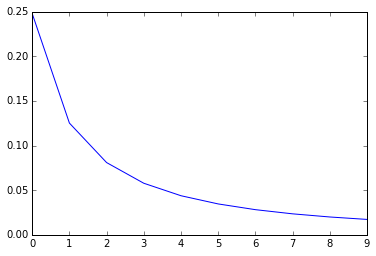

In [55]:
Q_hat
print(weighted_errors)
%matplotlib inline
plt.plot(weighted_errors)
#plt.xlabel('Iteration Number');
#plt.ylabel('Mean Squared Error');